In [ ]:
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from src.data.loaddata import load_data
import os
import matplotlib.pyplot as plt
import pickle
from src.data.Undersample import equnder_sample,random_under_sample
from src.data.eval import evaluate_model
# 多个受试者的数据
PROJ_TAG = 'c23_wosw_basic'
USE_NANSEIZURE_DATA = False
SAVE_PROCESSED_DATA = True
USE_SAVED_DATA = True

OVER_SAMPLING_RATIO = 0.5
UNDER_SAMPLING_RATIO = 0.5 # 保留多少比例的数据
RAMDOM_UNDER_SAMPLING = True
WINDOW_NUM = 2

In [2]:
# <读取含发作事件的数据> ----------------------------------------------------------
seizure_base_path = "data"
seizure_file_ids = [1, 21, 5, 14]

all_X_ws = []
all_y_ws = []

for file_id in seizure_file_ids:
    if USE_SAVED_DATA:
        data_file = f"{seizure_base_path}/data_subject_{file_id}.pkl"
        if os.path.exists(data_file):
            print(f"Loading data from {data_file} for subject {file_id}...")
            with open(data_file, 'rb') as f:
                X, y = pickle.load(f)
        else:
            print(f"Data file not found, loading and saving data for subject {file_id}...")
            X, y = load_data(file_id, seizure_base_path)
            if SAVE_PROCESSED_DATA:
                with open(data_file, 'wb') as f:
                    pickle.dump((X, y), f)
                print(f"Data saved to {data_file}.")
    else:
        X, y = load_data(file_id, seizure_base_path)
    all_X_ws.append(X)
    all_y_ws.append(y)
# <读取不含发作事件的数据> --------------------------------------------------------
nonseizure_base_path = "data_wos"
nonseizure_file_ids = [1, 2, 3]

all_X_wos = []
all_y_wos = []

for file_id in nonseizure_file_ids:
    if USE_NANSEIZURE_DATA:
        if USE_SAVED_DATA:
            data_file = f"{nonseizure_base_path}/data_subject_{file_id}.pkl"
            if os.path.exists(data_file):
                print(f"Loading data from {data_file} for subject {file_id}...")
                with open(data_file, 'rb') as f:
                    X, y = pickle.load(f)
            else:
                print(f"Data file not found, loading and saving data for subject {file_id}...")
                X, y = load_data(file_id, nonseizure_base_path)

                if SAVE_PROCESSED_DATA:
                    with open(data_file, 'wb') as f:
                        pickle.dump((X, y), f)
                    print(f"Data saved to {data_file}.")
        else:
            X, y = load_data(file_id, nonseizure_base_path)
        all_X_wos.append(X)
        all_y_wos.append(y)
# <合并数据> -----------------------------------------------
if USE_NANSEIZURE_DATA:
    all_X = np.vstack(all_X_ws + all_X_wos)
    all_y = np.concatenate(all_y_ws + all_y_wos)
else:
    all_X = np.vstack(all_X_ws)
    all_y = np.concatenate(all_y_ws)
all_X = all_X.reshape(-1, all_X.shape[-1])
all_y = all_y.reshape(-1)
print("总数据：", all_X.shape, all_y.shape)
print("原始发作数据量：", np.sum(all_y == 1))
print("原始发作百分比：", np.sum(all_y == 1) / all_y.shape[0])

Data file not found, loading and saving data for subject 1...
正在加载data\chb01\chb01_03.edf...


Processing windows: 100%|██████████| 900/900 [00:10<00:00, 86.39it/s]


正在加载data\chb01\chb01_04.edf...


Processing windows: 100%|██████████| 900/900 [00:09<00:00, 92.09it/s]


正在加载data\chb01\chb01_15.edf...


Processing windows: 100%|██████████| 900/900 [00:11<00:00, 78.41it/s]


正在加载data\chb01\chb01_16.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 72.96it/s]


正在加载data\chb01\chb01_18.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 71.94it/s]


正在加载data\chb01\chb01_21.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 72.42it/s]


Data saved to data/data_subject_1.pkl.
Data file not found, loading and saving data for subject 21...
正在加载data\chb21\chb21_19.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 73.10it/s]


正在加载data\chb21\chb21_21.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 72.17it/s]


正在加载data\chb21\chb21_22.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 73.55it/s]


Data saved to data/data_subject_21.pkl.
Data file not found, loading and saving data for subject 5...
正在加载data\chb05\chb05_06.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 74.66it/s]


正在加载data\chb05\chb05_13.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 73.74it/s]


正在加载data\chb05\chb05_16.edf...


Processing windows: 100%|██████████| 900/900 [00:11<00:00, 75.21it/s]


正在加载data\chb05\chb05_17.edf...


Processing windows: 100%|██████████| 900/900 [00:11<00:00, 75.93it/s]


正在加载data\chb05\chb05_22.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 73.82it/s]


Data saved to data/data_subject_5.pkl.
Data file not found, loading and saving data for subject 14...
正在加载data\chb14\chb14_03.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 69.84it/s]


正在加载data\chb14\chb14_06.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 72.67it/s]


正在加载data\chb14\chb14_11.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 73.64it/s]


正在加载data\chb14\chb14_17.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 74.97it/s]


正在加载data\chb14\chb14_18.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 70.36it/s]


正在加载data\chb14\chb14_27.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 73.81it/s]


Data saved to data/data_subject_14.pkl.
总数据： (18000, 36) (18000,)
原始发作数据量： 302
原始发作百分比： 0.016777777777777777


In [3]:
# <分离二元标签> ----------------------------------
def split_data(all_X, all_y):
    # 确保 all_y 是 NumPy 数组
    all_y = np.array(all_y)
    
    # 获取标签为 1 和 0 的样本
    one_indices = all_y == 1
    zero_indices = all_y == 0

    one_X = all_X[one_indices]
    one_y = all_y[one_indices]
    zero_X = all_X[zero_indices]
    zero_y = all_y[zero_indices]
    
    return one_X, one_y, zero_X, zero_y

one_X, one_y, zero_X, zero_y = split_data(all_X, all_y)

In [4]:
# <欠采样> ----------------------------------------------
under_X, under_y = zero_X, zero_y
if UNDER_SAMPLING_RATIO > 0:
    if RAMDOM_UNDER_SAMPLING:
        under_X, under_y = random_under_sample(zero_X, zero_y, UNDER_SAMPLING_RATIO)
    else:
        under_X, under_y = equnder_sample(zero_X, zero_y, UNDER_SAMPLING_RATIO)
    print("欠采样后数据：", under_X.shape, under_y.shape)
# <合并数据> ----------------------------------------------
all_X = np.vstack([one_X, under_X])
all_y = np.concatenate([one_y, under_y])

# <过采样> ----------------------------------------------
# 过采样后比例 = 1 / (1 + 1/OVER_SAMPLING_RATIO)
if OVER_SAMPLING_RATIO > 0:
    smote = SMOTE(sampling_strategy=OVER_SAMPLING_RATIO)
    over_X, over_y = smote.fit_resample(all_X, all_y)
    print("过采样后数据：", over_X.shape, over_y.shape)
    print("过采样后发作数据量：", np.sum(over_y == 1))
    print("合成数据比例：", (np.sum(over_y == 1) - np.sum(one_y)) / np.sum(over_y == 1))
    print("过采样后发作百分比：", np.sum(over_y == 1) / over_y.shape[0])


欠采样后数据： (8849, 36) (8849,)
过采样后数据： (15485, 36) (15485,)
过采样后发作数据量： 6636
合成数据比例： 0.9544906570223026
过采样后发作百分比： 0.42854375201808204


In [5]:
# <创建测试数据> ----------------------------------------------
base_path = "data"
file_ids = [16,3]
test_X = []
test_y = []
for file_id in file_ids:
    if USE_SAVED_DATA:
        data_file = f"{base_path}/data_subject_{file_id}.pkl"
        if os.path.exists(data_file):
            print(f"Loading data from {data_file} for subject {file_id}...")
            with open(data_file, 'rb') as f:
                X, y = pickle.load(f)
        else:
            print(f"Data file not found, loading and saving data for subject {file_id}...")
            X, y = load_data(file_id, base_path)
            if SAVE_PROCESSED_DATA:
                with open(data_file, 'wb') as f:
                    pickle.dump((X, y), f)
                print(f"Data saved to {data_file}.")
    else:
        X, y = load_data(file_id, base_path)
    test_X.append(X)
    test_y.append(y)
test_X = np.vstack(test_X)
test_y = np.concatenate(test_y)
test_X = test_X.reshape(-1, test_X.shape[-1])
test_y = test_y.reshape(-1)
print("测试数据：", test_X.shape, test_y.shape)
print("测试发作数据量：", np.sum(test_y == 1))
print("测试发作百分比：", np.sum(test_y == 1) / test_y.shape[0])

Data file not found, loading and saving data for subject 16...
正在加载data\chb16\chb16_10.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 72.03it/s]


正在加载data\chb16\chb16_11.edf...


Processing windows: 100%|██████████| 900/900 [00:10<00:00, 86.30it/s]


正在加载data\chb16\chb16_14.edf...


Processing windows: 100%|██████████| 900/900 [00:10<00:00, 86.22it/s]


正在加载data\chb16\chb16_16.edf...


Processing windows: 100%|██████████| 900/900 [00:10<00:00, 87.90it/s]


正在加载data\chb16\chb16_17.edf...


Processing windows: 100%|██████████| 900/900 [00:12<00:00, 74.56it/s]


正在加载data\chb16\chb16_18.edf...


Processing windows: 100%|██████████| 900/900 [00:13<00:00, 66.91it/s]


Data saved to data/data_subject_16.pkl.
Data file not found, loading and saving data for subject 3...
正在加载data\chb03\chb03_01.edf...


Processing windows: 100%|██████████| 900/900 [00:14<00:00, 62.68it/s]


正在加载data\chb03\chb03_02.edf...


Processing windows: 100%|██████████| 900/900 [00:13<00:00, 65.61it/s]


正在加载data\chb03\chb03_03.edf...


Processing windows: 100%|██████████| 900/900 [00:13<00:00, 64.84it/s]


正在加载data\chb03\chb03_04.edf...


Processing windows: 100%|██████████| 900/900 [00:16<00:00, 55.96it/s]


正在加载data\chb03\chb03_34.edf...


Processing windows: 100%|██████████| 900/900 [00:16<00:00, 53.93it/s]


正在加载data\chb03\chb03_35.edf...


Processing windows: 100%|██████████| 900/900 [00:13<00:00, 68.60it/s]


正在加载data\chb03\chb03_36.edf...


Processing windows: 100%|██████████| 900/900 [00:14<00:00, 60.23it/s]

Data saved to data/data_subject_3.pkl.
测试数据： (11700, 36) (11700,)
测试发作数据量： 119
测试发作百分比： 0.010170940170940172


### 训练相关

In [6]:
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

<Figure size 640x480 with 0 Axes>

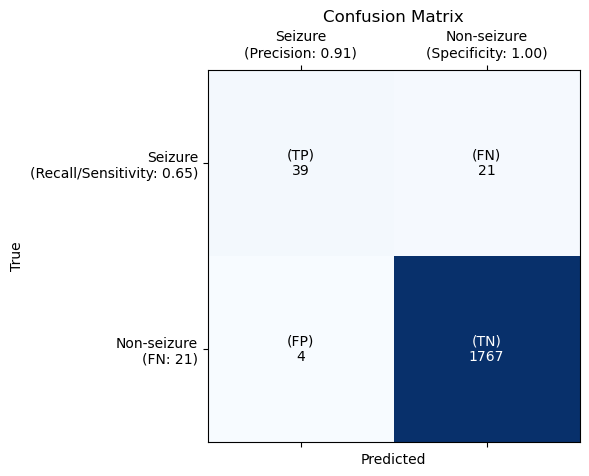

F1 分数: 0.7572815533980582


<Figure size 640x480 with 0 Axes>

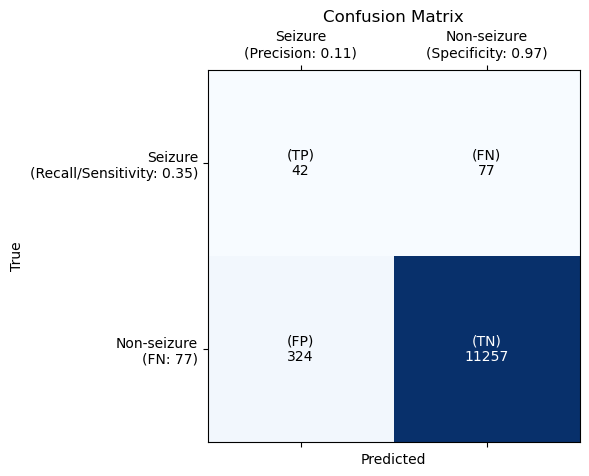

F1 分数: 0.1731958762886598


In [7]:
train_X, val_X, train_y, val_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)
# 训练随机森林分类器
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(train_X, train_y)
# 预测
# 输出y的正例数量
# 统计1的数量
val_y_pred = clf.predict(val_X)
evaluate_model(val_y, val_y_pred)

test_y_pred = clf.predict(test_X)
evaluate_model(test_y, test_y_pred)


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# min-max标准化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_X = scaler.fit_transform(all_X)
test_X = scaler.transform(test_X)

# 切分数据
train_X, val_X, train_y, val_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)

# 训练SVM分类器
clf = SVC(random_state=0)  # 你可以根据需要调整其他参数，如kernel等
clf.fit(train_X, train_y)

# 预测
val_y_pred = clf.predict(val_X)
evaluate_model(val_y, val_y_pred)

test_y_pred = clf.predict(test_X)
evaluate_model(test_y, test_y_pred)


训练集： (7320, 2, 18, 1) (7320,)
验证集： (1831, 2, 18, 1) (1831,)
测试集： (11700, 2, 18, 1) (11700,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 2, 17, 32)         96        
                                                                 
 flatten_2 (Flatten)         (None, 1088)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                69696     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 69,857
Trainable params: 69,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
915/915 [==============================] - 22s 23ms/step - loss: 0.0315 - accur

<Figure size 640x480 with 0 Axes>

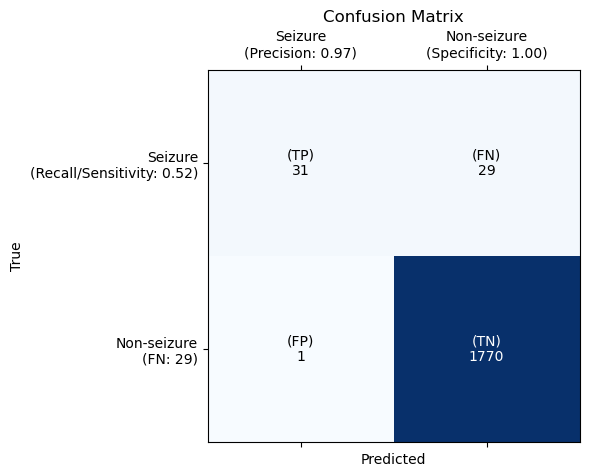

F1 分数: 0.673913043478261
366/366 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

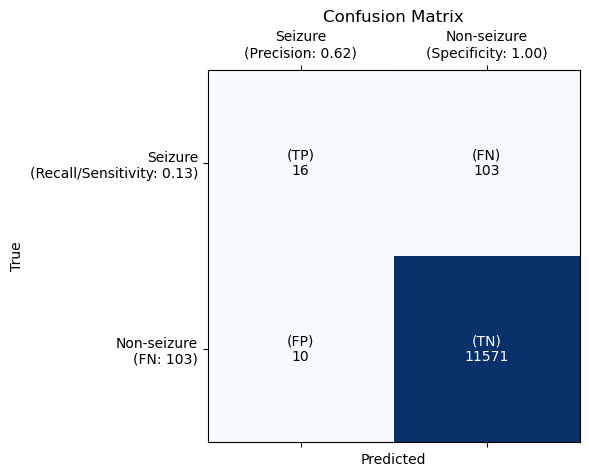

F1 分数: 0.2206896551724138


In [10]:
# 分割处理后的数据集
all_X_2d = all_X.reshape(all_X.shape[0], WINDOW_NUM, -1)
test_X_2d = test_X.reshape(test_X.shape[0], WINDOW_NUM, -1)
train_X_2d, val_X_2d, train_y, val_y = train_test_split(
    all_X_2d, all_y, test_size=0.2, random_state=42, stratify=all_y)

# max-min normalization
# @TODO: 这里的归一化方式可能不太对，需要根据实际情况调整(或统一最大最小值)
train_X_2d = (train_X_2d - np.min(train_X_2d)) / (np.max(train_X_2d) - np.min(train_X_2d))
val_X_2d = (val_X_2d - np.min(val_X_2d)) / (np.max(val_X_2d) - np.min(val_X_2d))
test_X_2d = (test_X_2d - np.min(test_X_2d)) / (np.max(test_X_2d) - np.min(test_X_2d))

# 增加通道维度
train_X_2d = train_X_2d[:, :, :, np.newaxis]
val_X_2d = val_X_2d[:, :, :, np.newaxis]
test_X_2d = test_X_2d[:, :, :, np.newaxis]
print("训练集：", train_X_2d.shape, train_y.shape)
print("验证集：", val_X_2d.shape, val_y.shape)
print("测试集：", test_X_2d.shape, test_y.shape)

# 创建卷积神经网络模型
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1, WINDOW_NUM), activation='relu', input_shape=(WINDOW_NUM, 18, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 编译模型
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.compile(optimizer='adam', loss=keras.losses.BinaryFocalCrossentropy(gamma=2.0, from_logits=False), metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 训练模型
model.fit(train_X_2d, train_y, epochs=10, batch_size=8, validation_data=(val_X_2d, val_y))

# 对 val_X 进行预测
val_y_pred = model.predict(val_X_2d)
val_y_pred = (val_y_pred > 0.5).astype(int).reshape(-1)
evaluate_model(val_y, val_y_pred)

# 对 test_X 进行预测
test_y_pred = model.predict(test_X_2d)
test_y_pred = (test_y_pred > 0.5).astype(int).reshape(-1)
evaluate_model(test_y, test_y_pred)
